# What is this notebook about?

This notebook is intended both as an introduction to the usage of the ham1d package and
as a method of checking the correctness of the Hamiltonian construction and
diagonalization results for quasirandom potentials and fermionic chains. 

## The Hamiltonian
The model Hamiltonian is as follows:

$$
\begin{split}
\hat{H} &= J_1 \left[ \sum_l^L \frac{1}{2}\left(\hat{c}^\dagger_l\hat{c}_{l+1} + \mathrm{h.c.} \right) + \Delta \left(\hat{n}_l - \frac{1}{2}\right)\left(\hat{n}_{l+1} - \frac{1}{2}\right)\right]\\ 
& + J_2 \left[ \sum_l^L \frac{1}{2}\left(\hat{c}^\dagger_l\hat{c}_{l+2} + \mathrm{h.c.} \right) + \Delta \left(\hat{n}_l - \frac{1}{2}\right)\left(\hat{n}_{l+2} - \frac{1}{2}\right)\right]\\
& + h \left[\sum_{l=1}^L \cos\left(2\pi\alpha l\right) \left(\hat{n}_l - \frac{1}{2}\right)\right],
\end{split}
$$
where operators in the above expression are the standard fermionic creation and annihilation operators. Below 
we show how to construct such a Hamiltonian and diagonalize it.

## The code

In [1]:
%matplotlib inline
"""
Each of the modules defined in ham1d.models defines a class
for construction of a particular hamiltonian type. All of the
classes share the same base class and thus their functionality
is more or less the same, the difference is in the internal routines
used.
"""

# to load classes utilizing numba's jit
# compilation optimizations, load the following
# modules. The following lines would load a module
# with routines for creation of spinless fermionic
# hamiltonians.
from ham1d.models import ferm1d as fe1
import numpy as np
import matplotlib.pyplot as plt

## Defining the model constants

In [243]:
#first, define the chain length. We choose a rather small system here:
L=12
# define constants and model parameters:
J=1 # J1 and J2 the same
W=1
delta = 0.55 #Delta1 and Delta2 the same
gldn = (np.sqrt(5.) - 1.) * 0.5

In [244]:
# hopping part

# one-site hopping
J_l1 = [[J * 0.5 , i, (i + 1)%L] for i in range(L)] # the %L part ensures PBC
J_r1 =  [[J * 0.5 , i, (i - 1)%L] for i in range(L)]
# two-site hoppings
J_l2 = [[J * 0.5 , i, (i + 2)%L] for i in range(L)] # the %L part ensures PBC
J_r2 =  [[J * 0.5 , i, (i - 2)%L] for i in range(L)]
hops = [['+-', J_l1], ['+-', J_r1], ['+-', J_l2], ['+-', J_r2]]
#hops = [['+-', J_l1], ['+-', J_r1]]

# interaction
inter1 = [[J * delta , i, (i + 1)%L] for i in range(L)]
inter2 = [[J * delta , i, (i + 2)%L] for i in range(L)]
inters_nnn = [['nn', inter1], ['nn', inter2]]
inters_nn = [['nn', inter1],]
#random field

#fields = np.cos(2*np.pi*np.arange(1., L + 1, 1.)/L)
fields = np.array([W * np.cos(2*np.pi*gldn*i) for i in range(1, L+1, 1)])
#fields = np.array([10. for i in range(1, L+1)])
#fields = 3*np.ones(L, dtype=np.float64)
J_z = [[fields[i], i] for i in range(L)]
rnd = ['n', J_z]

# we can now put together the static_list -> just a list of hamiltonian term
# definitions

static_list_nn = [*hops, *inters_nn, rnd]
static_list_nnn = [*hops, *inters_nnn, rnd]

In [245]:
ham_nn = fe1.hamiltonian(L, static_list_nn, Nu= int(L/2.))
ham_nnn = fe1.hamiltonian(L, static_list_nnn, Nu = int(L/2.))

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!


In [246]:
eigvals_nn = ham_nn.eigvals()
eigvals_nnn, eigvecs_nnn = ham_nnn.eigsystem()

### No second-nearest neighbour interaction

In [247]:
print('First ten eigenvalues')
print(eigvals_nn[:10])
print('Spectral extrema:')
print(eigvals_nn[0], eigvals_nn[-1])

First ten eigenvalues
[-6.57496474 -6.28068144 -6.0555526  -5.88869441 -5.80403539 -5.76387364
 -5.57025431 -5.48824717 -5.33345021 -5.29639836]
Spectral extrema:
-6.574964736056567 5.78039108886081


### Also the second-nearst neighbour interaction

In [248]:
print('First ten eigenvalues')
print(eigvals_nnn[:10])
print('Spectral extrema:')
print(eigvals_nnn[0], eigvals_nnn[-1])

First ten eigenvalues
[-6.93237208 -6.46613481 -6.41940434 -6.31946299 -5.91623982 -5.80170174
 -5.75450646 -5.70928097 -5.66811137 -5.5843596 ]
Spectral extrema:
-6.932372080140295 5.53238086317709


[[-0.0, 0],
 [0.0, 1],
 [0.0, 2],
 [-0.0, 3],
 [0.0, 4],
 [-0.0, 5],
 [-0.0, 6],
 [0.0, 7],
 [-0.0, 8],
 [0.0, 9],
 [0.0, 10],
 [-0.0, 11]]

In [210]:
fields

array([ 8.66025404e-01,  5.00000000e-01,  6.12323400e-17, -5.00000000e-01,
       -8.66025404e-01, -1.00000000e+00, -8.66025404e-01, -5.00000000e-01,
       -1.83697020e-16,  5.00000000e-01,  8.66025404e-01,  1.00000000e+00])

In [108]:
rnd

['n', array([[-0.73736888,  0.        ],
        [ 0.08742572,  1.        ],
        [ 0.60843886,  2.        ],
        [-0.98471349,  3.        ],
        [ 0.84375529,  4.        ],
        [-0.2596043 ,  5.        ],
        [-0.46090702,  6.        ],
        [ 0.9393213 ,  7.        ],
        [-0.92434556,  8.        ],
        [ 0.423846  ,  9.        ],
        [ 0.29928386, 10.        ],
        [-0.86521121, 11.        ]])]

In [110]:
ham_nnn.mat.todense()

matrix([[ 1.57702708+0.j,  0.5       +0.j, -0.5       +0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [ 0.5       +0.j,  1.2283298 +0.j,  0.5       +0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.5       +0.j,  0.5       +0.j,  1.7816894 +0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        ...,
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         -0.6816894 +0.j,  0.5       +0.j,  0.5       +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
          0.5       +0.j,  0.9716702 +0.j,  0.5       +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
          0.5       +0.j,  0.5       +0.j,  1.72297292+0.j]])

In [111]:
help(fe1.hamiltonian)

Help on class hamiltonian in module ham1d.models.ferm1d:

class hamiltonian(ham1d.models._base_ham_cls._hamiltonian_numba)
 |  A child class of the _hamiltonian class which is
 |  intented for calculations in both the fermionic
 |  and spin 1/2 cases using the numba jit-compiled
 |  code. Note that the examples below are given
 |  for the spin 1/2 case.
 |  
 |  Parameters:
 |  -----------
 |  L: int
 |      An integer specifying the spin chain length.
 |  
 |  static_list: list
 |      A nested list of the operator description strings
 |      and site-coupling lists for the time-independent
 |      part of the Hamiltonian. An example of the
 |      static_ham list would be:
 |  
 |          static_ham = [['zz', J_zz]]
 |  
 |      Here, 'zz' is the operator descriptor string specifiying
 |      2-spin interaction along the z-axis direction. For a chain-
 |      of L sites with constant nearest-neighbour exchange
 |      J and PBC, the site coupling list would be given by:
 |  
 |     

In [113]:
ham_nnn.static_list

[['+-', array([[ 0.5,  0. ,  1. ],
         [ 0.5,  1. ,  2. ],
         [ 0.5,  2. ,  3. ],
         [ 0.5,  3. ,  4. ],
         [ 0.5,  4. ,  5. ],
         [ 0.5,  5. ,  6. ],
         [ 0.5,  6. ,  7. ],
         [ 0.5,  7. ,  8. ],
         [ 0.5,  8. ,  9. ],
         [ 0.5,  9. , 10. ],
         [ 0.5, 10. , 11. ],
         [ 0.5, 11. ,  0. ]])], ['+-', array([[ 0.5,  0. , 11. ],
         [ 0.5,  1. ,  0. ],
         [ 0.5,  2. ,  1. ],
         [ 0.5,  3. ,  2. ],
         [ 0.5,  4. ,  3. ],
         [ 0.5,  5. ,  4. ],
         [ 0.5,  6. ,  5. ],
         [ 0.5,  7. ,  6. ],
         [ 0.5,  8. ,  7. ],
         [ 0.5,  9. ,  8. ],
         [ 0.5, 10. ,  9. ],
         [ 0.5, 11. , 10. ]])], ['+-', array([[ 0.5,  0. ,  2. ],
         [ 0.5,  1. ,  3. ],
         [ 0.5,  2. ,  4. ],
         [ 0.5,  3. ,  5. ],
         [ 0.5,  4. ,  6. ],
         [ 0.5,  5. ,  7. ],
         [ 0.5,  6. ,  8. ],
         [ 0.5,  7. ,  9. ],
         [ 0.5,  8. , 10. ],
         [ 0.5,  9. ,

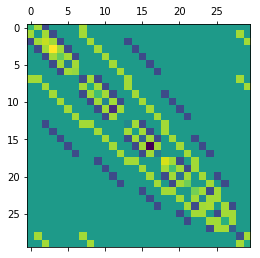

In [174]:
plt.matshow(np.real(ham_nnn.mat.todense()[:30,:30]))

In [164]:
1. / L**2

0.006944444444444444

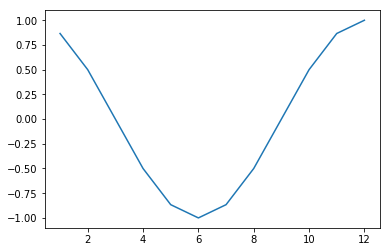

In [209]:
plt.plot(np.arange(1, L+1, 1), fields)

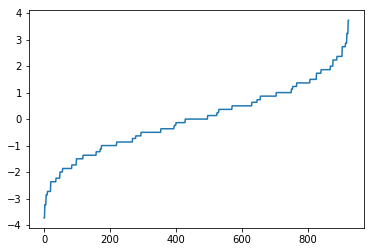

In [213]:
plt.plot(np.sort(eigvals_nnn))